## Final Project Submission - Developing predictions for house prices in King County

Please fill out:
* Student name: **Group 3** (Vivian Watiri, Wilfred Njagi, Antony Kanai, Sheila Kamanzi, Eunita Nyengo, Bryan Okwach, Cynthia Nasimiyu)
* Student pace: **Part time** 
* Scheduled project review date/time:**2/6/2023** 

# Business Understanding
### Brief History and Information on the General Housing Market
The housing market has been shaped by significant events and trends over the years. The Subprime Mortgage Crisis of 2007-2008 triggered a global financial crisis, causing a downturn in the housing market and widespread foreclosures. Post-crisis recovery varied across regions, with some areas rebounding faster than others. Urbanization has driven housing demand, leading to price appreciation and high-density housing development. Governments intervene through policies to promote homeownership and address housing shortages. General trends in the housing market include supply and demand dynamics, price appreciation over the long term, regional disparities, the impact of interest rates and mortgage markets, and housing affordability challenges.

### Problem Statement 
The project conducted by group 3 focuses on the analysis of the King County House Sales dataset through multiple linear regression. The main goal is to gain insights into the housing market and develop accurate predictions for house prices in King County, Washington, United States. By examining the relationships between various features of a house and its corresponding sale price, the project aims to provide a deeper understanding of the factors that influence housing prices in the area.

### Stakeholder
The stakeholder in this project is a real estate agent. The project aims to empower the real estate agent with data-driven information to help them provide expert advice to their clients, whether they are buyers or sellers. With a better understanding of the significant factors influencing house prices in King County, the real estate agent can assist buyers in determining the appropriateness of a property's price and help sellers set competitive prices.

In conclusion, by leveraging the insights gained from this analysis, the stakeholder can make more informed decisions, improve market efficiency, and contribute to the overall development of the real estate sector in King County.

# Data Understanding

The data used for this project is in csv format.
It is data on feautures that affect house prices in Kingcounty. The data understanding section below explores more on this data set.


In [1]:
#importing the relevant libraries
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import kstest

import warnings

# importing the dataset
kingcounty_df = pd.read_csv("kc_house_data.csv")
kingcounty_df.sample(3)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16327,366000095,10/9/2014,890000.0,5,1.0,2590,4652,2.0,NO,NONE,...,8 Good,2310,280.0,1907,NaN,98122,47.6038,-122.294,2360,4650
1598,1531000140,7/1/2014,650000.0,4,2.5,3350,46748,2.0,NO,NONE,...,10 Very Good,3350,0.0,2004,0.0,98010,47.3432,-122.025,3350,39683
3342,2734101055,10/1/2014,425000.0,3,1.0,1790,6000,1.5,NO,NONE,...,8 Good,1790,0.0,1937,NaN,98108,47.5448,-122.320,1060,4000


In [2]:
# check for number of rows and columns
kingcounty_df.shape 

(21597, 21)

Our dataset has 21597 rows and 21  columns.

In [3]:
#checking the datatypes of the columns
kingcounty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

- Six columns have their datatypes as strings while 15 are numeric. There is a date column which is among the six columns whose data type is an object this will be converted to date object to facilitate feature engineering. 

- Sqft_basement has its datatype as strings yet it should be numeric, therefore needs transformation. - The grade column mixes two datatypes. 
- The other three, waterfront, view, and condition are have categorical data.

##### Checking for general Statistics of the data



In [4]:
kingcounty_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


A quick sneak peak of some of the columns in our dataset reveals the following statistics: 

- That the Average price of a house in King county is USD 540,296.6 with the maximum price being USD 7,700,000 and the minimum price being USD 78,000. The standard deviation of the price is USD 367,368.

- The average number of bedrooms of a house in King County is 3 bedrooms with the maximum number of bedrooms being 33 and the minimum being 1. The standard deviation is 0.93. 

- For the number of bathrooms, the average number of bathrooms is 2. The house that has the highest number of bathrooms has 8 while the one that has the least has 0.5.  The standard deviation is 0.77. 

- The average number of floors in house in King county is 1.49 with the highest having 3.5 floors and the lowest having 1 with a spread of 0.5 

##### Checking proportion of null Values in our dataset

In [5]:
kingcounty_df.isna().mean()*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

From the above output:
- 11% of the data in the waterfront column consists of null values
- 0.2% of the data in the view column consist of null values
- 17.78% of the data in the Yr-Renovated consists of missing values

# Data Preparation

### Dealing with Misssing Data
Currently the following columns in the dataset contain missing data.
* Water front - 2376,
* view - 63
* yr_renovated - 3842

The rows containing missing columns identified above will be dropped based on the following justifications:

- Dropping the rows will not result to the loss of a proportionate percentage of the whole large dataset since the missing values constitute a small percentage

- Replacing the categorical variables with any form of measure of central tendency would result to data that might potentially lead to bias in the model. 

In [6]:
# droppin the rows missing data
kingcounty_df.dropna(inplace = True)

### Dealing with duplicates 

In [7]:
# checking for duplicates using the id column
duplicates = kingcounty_df[kingcounty_df.duplicated(
subset = "id")]
duplicates.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
718,8820903380,1/2/2015,730000.0,6,2.25,2660,13579,2.0,NO,NONE,...,7 Average,2660,0.0,1937,1990.0,98125,47.7142,-122.286,1120,8242
837,8682262400,5/13/2015,419950.0,2,1.75,1350,4003,1.0,NO,NONE,...,8 Good,1350,0.0,2004,0.0,98053,47.7176,-122.033,1350,4479
1085,9834200885,4/20/2015,550000.0,4,2.50,2080,4080,1.0,NO,NONE,...,7 Average,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080


In [8]:
duplicates.shape

(86, 21)

86 rows contain duplicated data. All duplicate rows present in the DataFrame were dropped.

In [9]:
# dropping the duplicated data
kingcounty_df.drop_duplicates(subset="id", keep="first", inplace=True)

### Dealing with Placeholders

In [10]:
# changing the sqft_basement column from categorical to numerical
kingcounty_df["sqft_basement"] = pd.to_numeric(kingcounty_df["sqft_basement"], errors='coerce')
kingcounty_df["sqft_basement"].dtypes

dtype('float64')

In [11]:
# missing data that was originally in filled by symbols
kingcounty_df["sqft_basement"].isna().sum()

332

The sqft_basement is missing **332** data points

In [12]:
# Drop the missing data in the above column
kingcounty_df.dropna(inplace = True)

In [13]:
kingcounty_df.shape

(15344, 21)

## Data Transformation

### Using ordinal encoding to convert categorical variables into numerical

In [14]:
#Checking for the ordinal data used in the "view" column
kingcounty_df["view"].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [15]:
# Using ordinal encoding to convert the ordinal range into numerical variables
# create a mapping dictionary
mapping_dict = {"NONE": 1, "FAIR": 2, "AVERAGE": 3, "GOOD": 4, "EXCELLENT": 5,}

# map the ordinal column to the appropriate numerical values
kingcounty_df['view_num'] = kingcounty_df['view'].map(mapping_dict)

In [16]:
#Using ordinal encoding to create numerical representation of the "waterfront" column
# Map 'yes' to 1 and 'no' to 0
kingcounty_df["waterfront_num"] = kingcounty_df["waterfront"].map({'YES': 1, 'NO': 0})                                                

kingcounty_df.head(5)

kingcounty_df.dtypes

id                  int64
date               object
price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront         object
view               object
condition          object
grade              object
sqft_above          int64
sqft_basement     float64
yr_built            int64
yr_renovated      float64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
view_num            int64
waterfront_num      int64
dtype: object

# Exploratory Data Analysis

## Distribution of target variable

Checking the distribution of the target variable which is the **price** of houses in King County

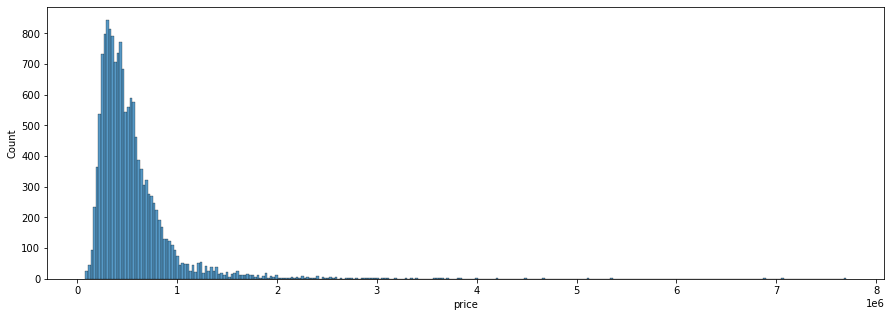

In [17]:
#setting figure size
plt.figure(figsize=(15,5))

#Plotting a histogram to check the distribution of the price
sns.histplot(kingcounty_df['price'])  
plt.show()


The data distribution is skewed to the right. The boxplot below allows us to investigate whether this is caused by outliers

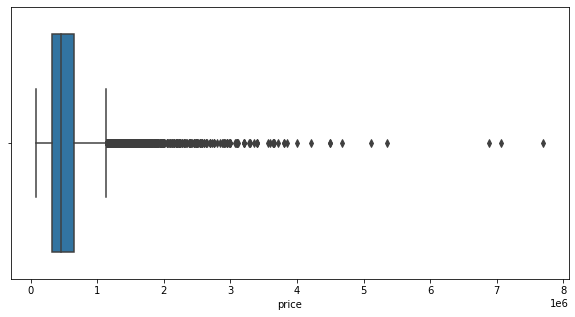

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=kingcounty_df['price'])
plt.show;

## Linearity assumption check

In this section of EDA, we will investigate which features are correlated with the target i.e **price**

The linearity check will require that their is a linear relationship between the response variable/target and the predictor variable

Text(0, 0.5, 'Price')

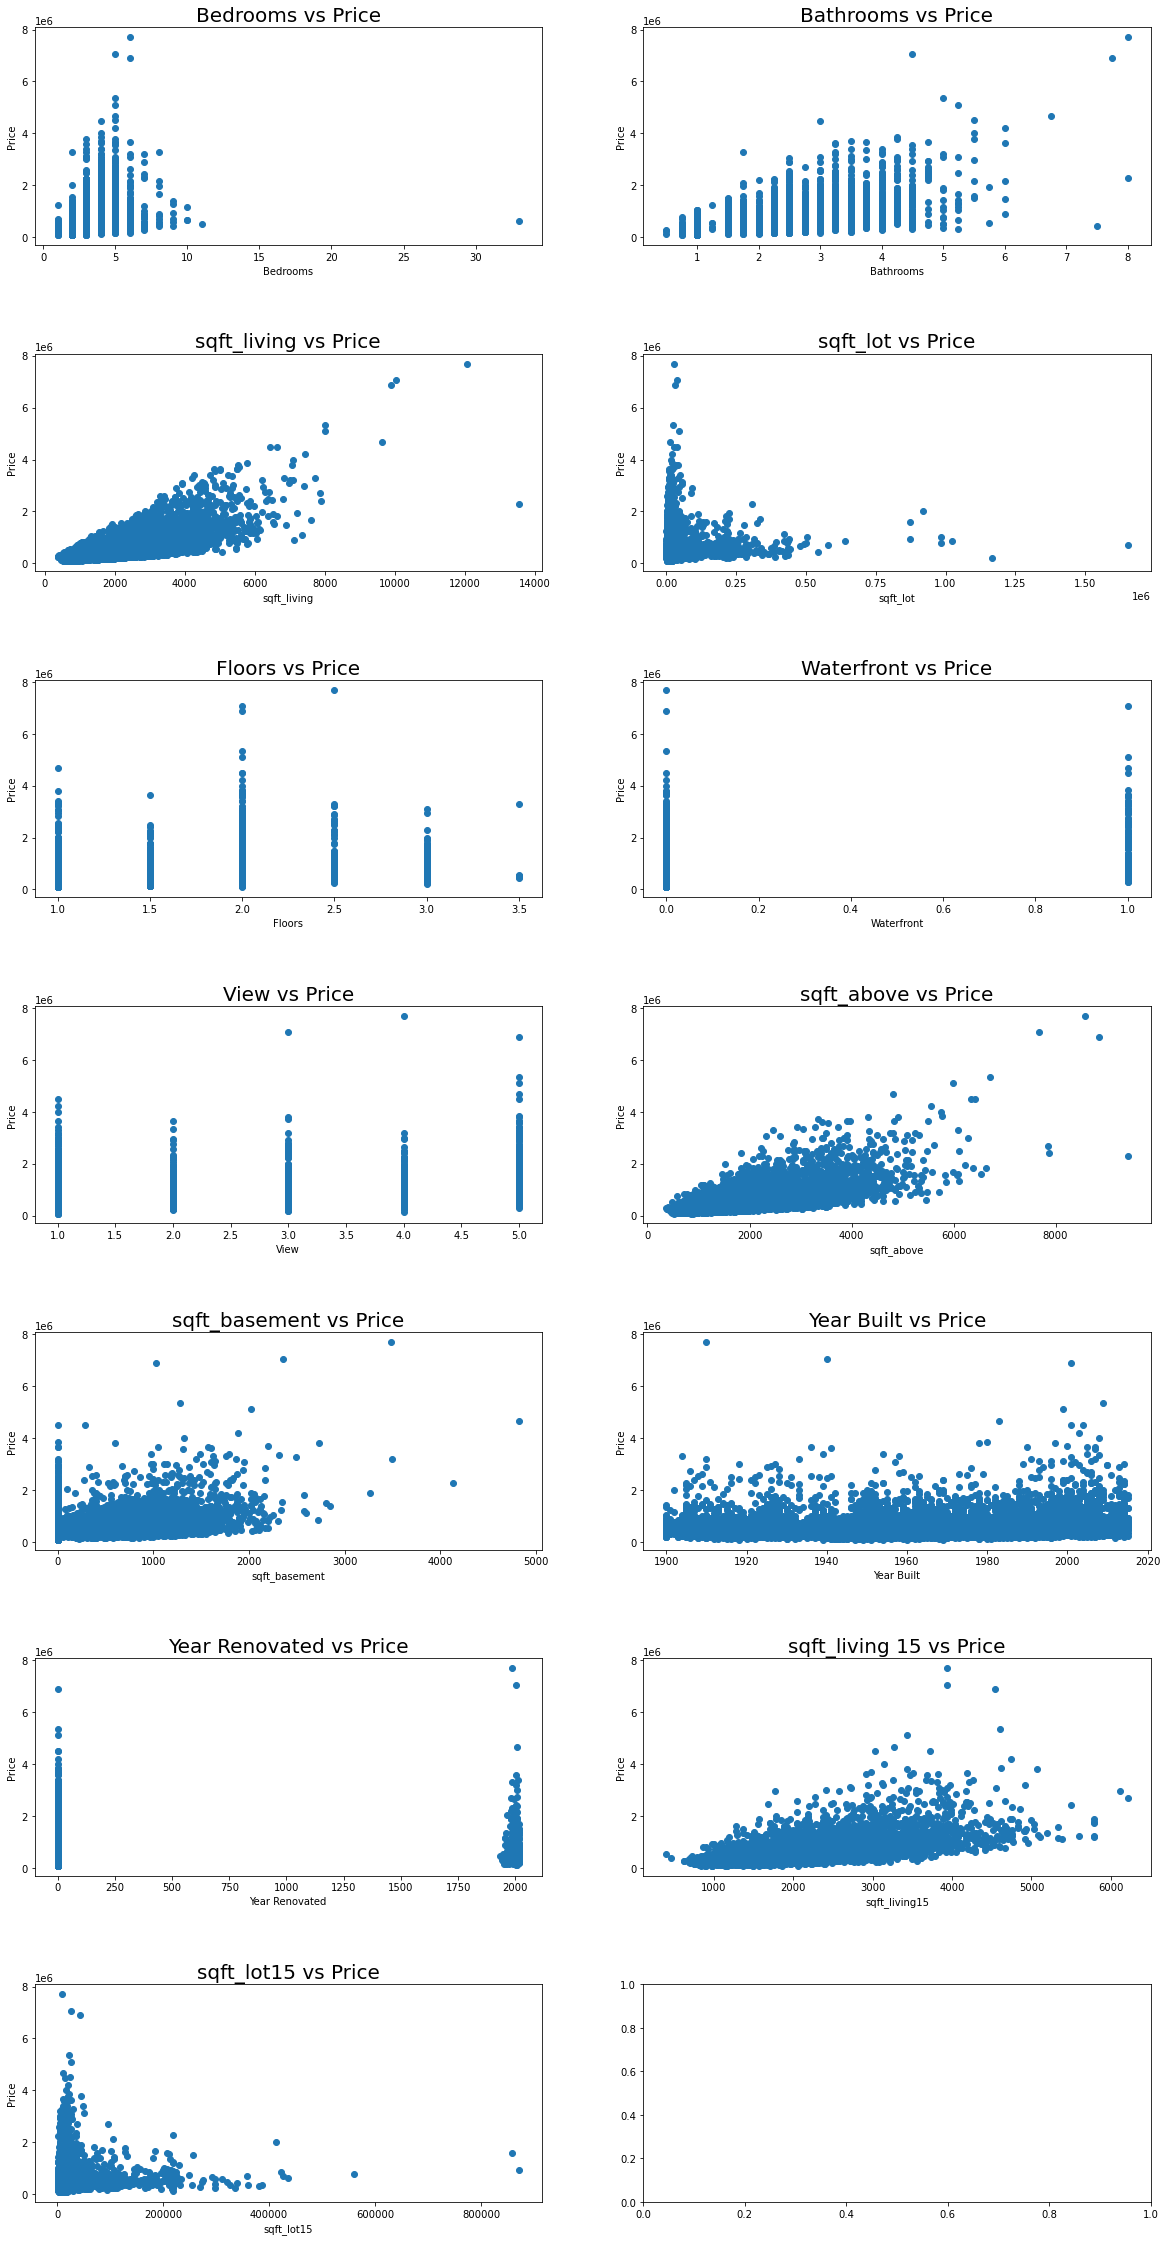

In [19]:
#Plotting the independent variables to the target 

fig, ax = plt.subplots(7,2, figsize=(20,40))
y = kingcounty_df["price"]
plt.subplots_adjust(hspace = 0.5)

#adjusting the font sizes in the scatterplots
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


ax[0,0].scatter(kingcounty_df['bedrooms'],y)
ax[0,0].set_title ("Bedrooms vs Price")
ax[0,0].set_xlabel("Bedrooms")
ax[0,0].set_ylabel("Price")

ax[0,1].scatter(kingcounty_df['bathrooms'],y)
ax[0,1].set_title ("Bathrooms vs Price")
ax[0,1].set_xlabel("Bathrooms")
ax[0,1].set_ylabel("Price")

ax[1,0].scatter(kingcounty_df['sqft_living'],y)
ax[1,0].set_title ("sqft_living vs Price")
ax[1,0].set_xlabel("sqft_living")
ax[1,0].set_ylabel("Price")

ax[1,1].scatter(kingcounty_df['sqft_lot'],y)
ax[1,1].set_title ("sqft_lot vs Price")
ax[1,1].set_xlabel("sqft_lot")
ax[1,1].set_ylabel("Price")

ax[2,0].scatter(kingcounty_df['floors'],y)
ax[2,0].set_title ("Floors vs Price")
ax[2,0].set_xlabel("Floors")
ax[2,0].set_ylabel("Price")

ax[2,1].scatter(kingcounty_df['waterfront_num'],y)
ax[2,1].set_title ("Waterfront vs Price")
ax[2,1].set_xlabel("Waterfront")
ax[2,1].set_ylabel("Price")

ax[3,0].scatter(kingcounty_df['view_num'],y)
ax[3,0].set_title ("View vs Price")
ax[3,0].set_xlabel("View")
ax[3,0].set_ylabel("Price")

ax[3,1].scatter(kingcounty_df['sqft_above'],y)
ax[3,1].set_title ("sqft_above vs Price")
ax[3,1].set_xlabel("sqft_above")
ax[3,1].set_ylabel("Price")

ax[4,0].scatter(kingcounty_df['sqft_basement'],y)
ax[4,0].set_title ("sqft_basement vs Price")
ax[4,0].set_xlabel("sqft_basement")
ax[4,0].set_ylabel("Price")

ax[4,1].scatter(kingcounty_df['yr_built'],y)
ax[4,1].set_title ("Year Built vs Price")
ax[4,1].set_xlabel("Year Built")
ax[4,1].set_ylabel("Price")

ax[5,0].scatter(kingcounty_df['yr_renovated'],y)
ax[5,0].set_title ("Year Renovated vs Price")
ax[5,0].set_xlabel("Year Renovated")
ax[5,0].set_ylabel("Price")

ax[5,1].scatter(kingcounty_df['sqft_living15'],y)
ax[5,1].set_title ("sqft_living 15 vs Price")
ax[5,1].set_xlabel("sqft_living15")
ax[5,1].set_ylabel("Price")

ax[6,0].scatter(kingcounty_df['sqft_lot15'],y)
ax[6,0].set_title ("sqft_lot15 vs Price")
ax[6,0].set_xlabel("sqft_lot15")
ax[6,0].set_ylabel("Price")

From the scatterplots, the following independent variables show a linear relationship in relationship to **price** which is the target variable:

1. Bathrooms
2. Sqft_living
3. Sqft_above
4. Sq_ft living 15

**Bedrooms** as an independent variable seems to be affected by an outlier

#### Using boxplots to check for linearity of discrete data

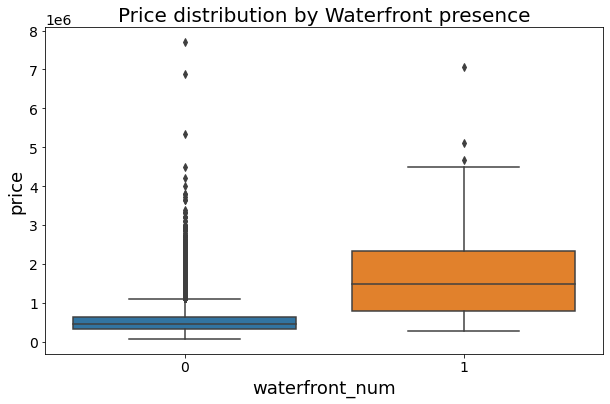

In [20]:
# Assuming 'waterfront' is a binary variable indicating presence (Yes) or absence (No) of a waterfront
# If it's not, you'll have to preprocess your data to convert 'waterfront' into a categorical variable

plt.figure(figsize=(10,6))

sns.boxplot(x='waterfront_num', y='price', data=kingcounty_df)

plt.title('Price distribution by Waterfront presence')
plt.show()

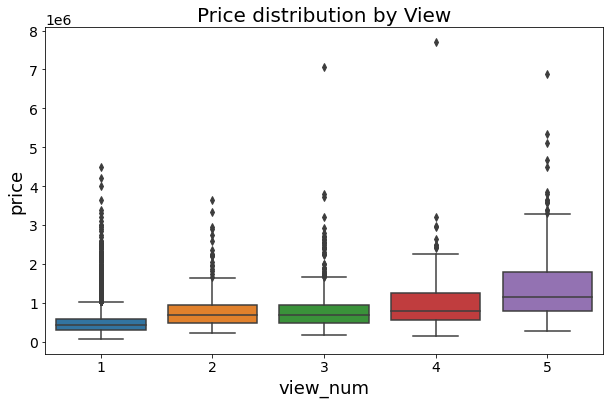

In [21]:
plt.figure(figsize=(10,6))

sns.boxplot(x='view_num', y='price', data=kingcounty_df)

plt.title('Price distribution by View')
plt.show()

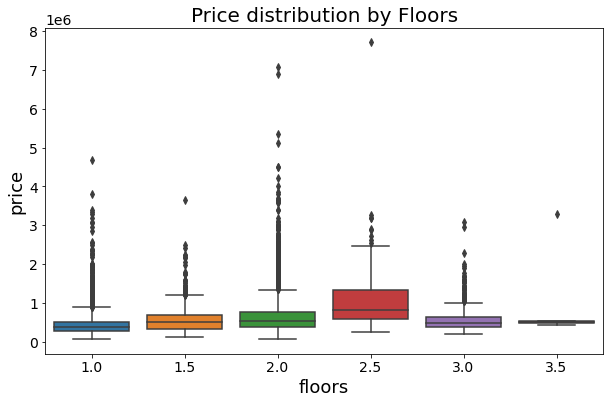

In [22]:
plt.figure(figsize=(10,6))

sns.boxplot(x='floors', y='price', data=kingcounty_df)

plt.title('Price distribution by Floors')
plt.show()

From the box plots, views and waterfront presence seem to have a linear relationship with price however the relationship between floors and price is not quite linear

## Multicollinearity check

This section of the EDA focuses on investigating whether there is any perfect linear relationships amongst the variables. A correlation matrix will be used for the multicollinearity check

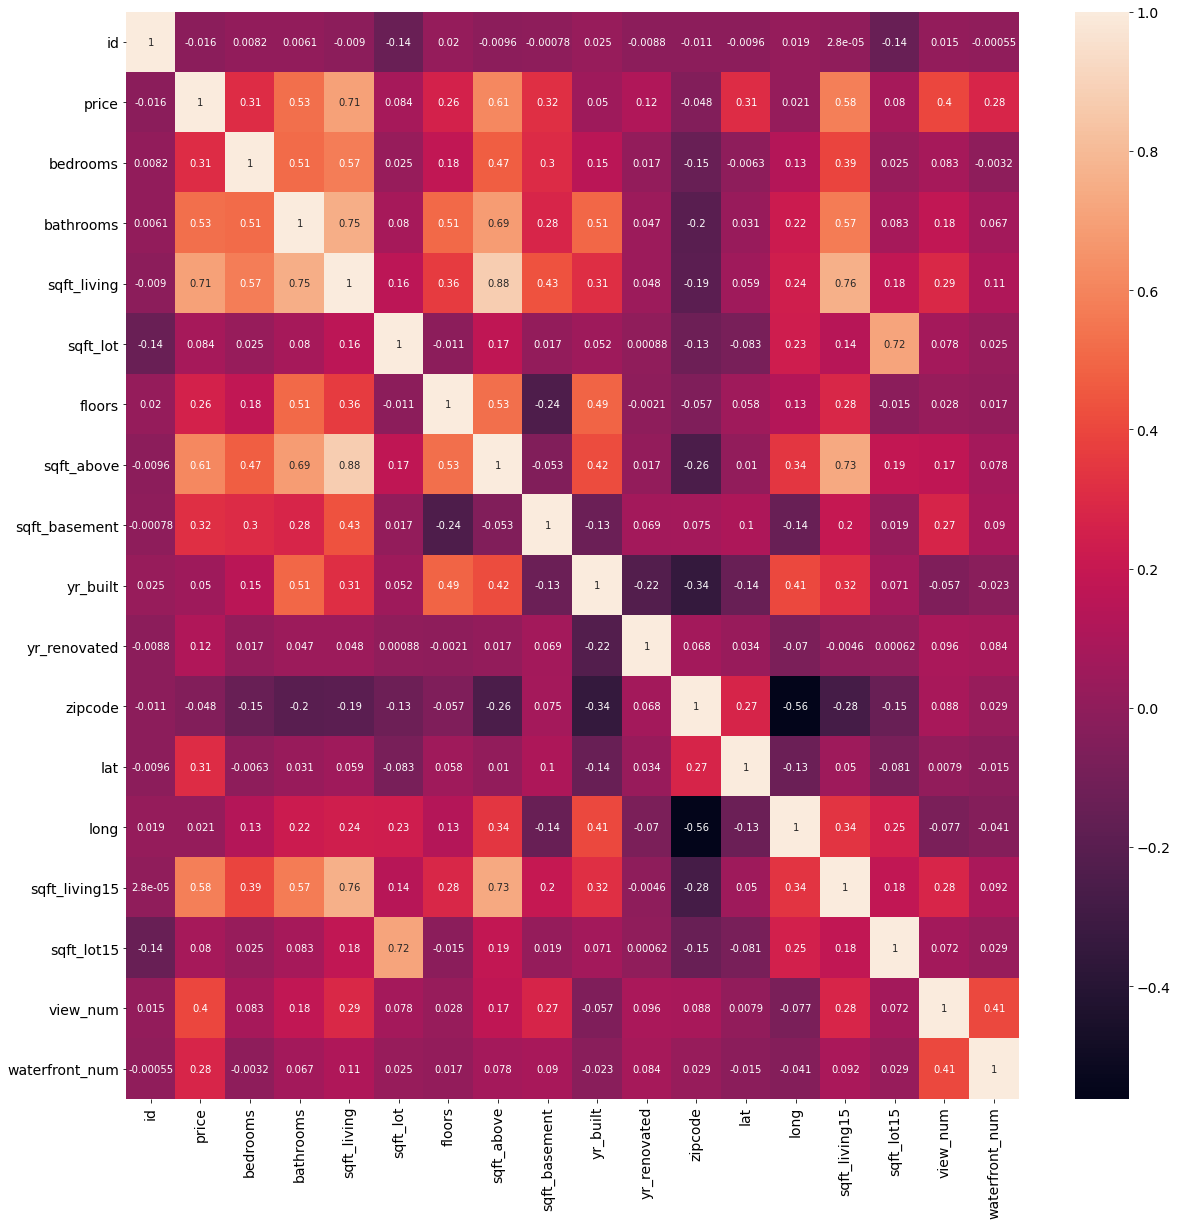

In [23]:
correlation_matrix = kingcounty_df.corr()

# Create a new figure with a specific size (in inches)
plt.figure(figsize=(20, 20))

sns.heatmap(correlation_matrix, annot=True)
plt.show()


Based on the results of the correlation matrix, some variables which show a high level of correlation would affect the accuracy of the model.

# Feature Engineering


### Feature 1: Seasons vs House Prices
Here we find the relationship between seasons and house prices. We converted the 'date' column to a datetime format by extracting the month from the date. Additionally, we mapped the months to corresponding seasons.

In [24]:
# # Convert 'date' column to datetime
kingcounty_df['date'] = pd.to_datetime(kingcounty_df['date'])
#Extract the month from the date column and create a new column
kingcounty_df['month'] = kingcounty_df['date'].dt.month
#Map months to correspondng seasons
season_mapping = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
                  7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
kingcounty_df['season'] = kingcounty_df['month'].map(season_mapping)
kingcounty_df[["price","season"]]

,price,season
1,538000.0,Winter
3,604000.0,Winter
4,510000.0,Winter
5,1230000.0,Spring
8,229500.0,Spring
...,...,...
21591,475000.0,Winter
21592,360000.0,Spring
21593,400000.0,Winter
21594,402101.0,Summer


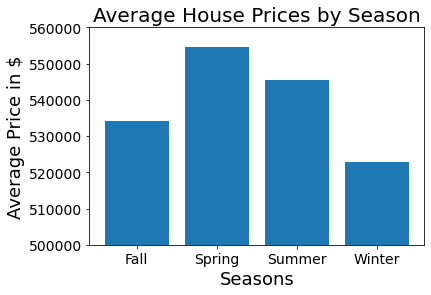

In [25]:
#Group price by seasons 
season_prices = kingcounty_df.groupby('season')['price'].mean()

# plot
seasons = ['Fall', 'Spring', 'Summer', 'Winter']

plt.bar(seasons, season_prices)

# Set x-label and y-label
plt.xlabel('Seasons')
plt.ylabel('Average Price in $')

# Set title
plt.title('Average House Prices by Season')

# Set y-axis limits
plt.ylim(500000, 560000)

# Show the plot
plt.show()

Conclusion from the graph above; the best time to buy houses is during winter and best time for selling is spring

### Feature 2: Distance from Seattle and its effect on house price in King County
Seattle is Washington State’s largest city, it’s home to a large tech industry, with Microsoft and Amazon headquartered in its metropolitan area. 

In [26]:
#Create a function that calculates distance
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Radius of the Earth in kilometers
    radius = 6371

    # Haversine formula
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = radius * c

    return distance

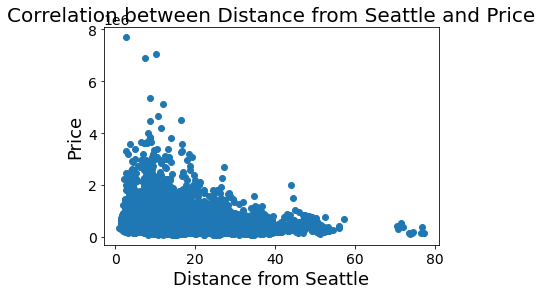

In [27]:
#Seattle is 47.6062° N, -122.3321° W </b

kingcounty_df['distance_from_seattle'] = kingcounty_df.apply(lambda row: haversine_distance(row['lat'], row['long'], 47.6062, -122.3321), axis=1)

# Create a scatter plot
plt.scatter(kingcounty_df['distance_from_seattle'], kingcounty_df['price'])
plt.xlabel('Distance from Seattle')
plt.ylabel('Price')
plt.title('Correlation between Distance from Seattle and Price')


# Display the plot
plt.show()

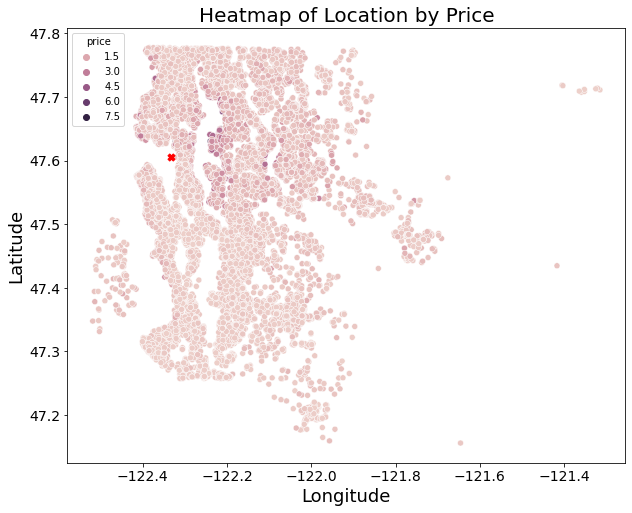

In [28]:
import folium
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with color-coded price
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', hue='price', data=kingcounty_df, cmap='hsv', alpha=1)

# Set the title and labels
plt.title('Heatmap of Location by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a marker for Seattle on the scatter plot
seattle_lat = 47.6062
seattle_long = -122.3321
plt.scatter(seattle_long, seattle_lat, color='red', marker='X', s=50, label='Seattle')

# Create a map centered around Seattle
seattle_map = folium.Map(location=[seattle_lat, seattle_long], zoom_start=10)

# Add a marker for Seattle on the map
folium.Marker(location=[seattle_lat, seattle_long], popup='Seattle').add_to(seattle_map)

# Display both the scatter plot and the map
plt.show()
seattle_map

Seattle being the largest City in the County has other amenities in addition to better schools and also offers a better job market with large multinational employers. This makes it a top homeowners choice 

## Preprocessing
We droppped all the ordinal variables for simplicity of our regression model.
We also dropped the ID variable which does not make meaningful contribution to the model

In [29]:
data_df = kingcounty_df.drop(["date", "id", "month", "view", "condition", "grade", "view_num", "waterfront_num","zipcode","lat","long"], axis=1)
data_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,season,distance_from_seattle
1,538000.0,3,2.25,2570,7242,2.0,NO,2170,400.0,1951,1991.0,1690,7639,Winter,12.802819
3,604000.0,4,3.00,1960,5000,1.0,NO,1050,910.0,1965,0.0,1360,5000,Winter,10.538233
4,510000.0,3,2.00,1680,8080,1.0,NO,1680,0.0,1987,0.0,1800,7503,Winter,21.553979
5,1230000.0,4,4.50,5420,101930,1.0,NO,3890,1530.0,2001,0.0,4760,101930,Spring,25.131188
8,229500.0,3,1.00,1780,7470,1.0,NO,1050,730.0,1960,0.0,1780,8113,Spring,10.447676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,NO,1180,130.0,2008,0.0,1330,1265,Winter,6.601720
21592,360000.0,3,2.50,1530,1131,3.0,NO,1530,0.0,2009,0.0,1530,1509,Spring,10.404472
21593,400000.0,4,2.50,2310,5813,2.0,NO,2310,0.0,2014,0.0,1830,7200,Winter,10.853552
21594,402101.0,2,0.75,1020,1350,2.0,NO,1020,0.0,2009,0.0,1020,2007,Summer,2.807293


# LINEAR REGRESSION

## Baseline Model

Our Baseline is the first model to be run and  will include almost all the feature variables. We begin by defining our dependent variable(y) and our independent variable (X)

In [30]:
y = data_df["price"]

X_baseline = data_df.drop(data_df.columns[:1], axis=1) 

# The Indepndent variable X_baseline is a dataframe that has eliminated Price which is the target variable 

##### Converting categrical variables to dummies
To include our categorical variables in our model we code them to numeric data through pandas feature; get dummies 

In [31]:
X_baseline = pd.get_dummies(X_baseline, columns = ["waterfront", "season"],drop_first =True)
X_baseline.sample(3)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,distance_from_seattle,waterfront_YES,season_Spring,season_Summer,season_Winter
20881,5,3.5,4230,16526,2.0,4230,0.0,2008,0.0,3000,12362,10.082311,0,1,0,0
19765,5,3.5,3931,9497,2.0,2650,1281.0,2014,0.0,3510,9497,34.199897,0,0,0,0
8804,5,2.0,2600,3750,1.5,1400,1200.0,1914,0.0,1700,3750,7.420834,0,0,0,1


##### Running our Baseline Regression Model

In [32]:
baseline_model= sm.OLS(y, sm.add_constant(X_baseline))
baseline = baseline_model.fit()

print(baseline.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     2205.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:51:56   Log-Likelihood:            -2.0982e+05
No. Observations:               15344   AIC:                         4.197e+05
Df Residuals:                   15328   BIC:                         4.198e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.689e+

##### Checking for RMSE and MAE using SKlearn

In [33]:
y_predbaseline = baseline.predict(sm.add_constant(X_baseline))
# use fitted model to generate predictions for y

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y, y_predbaseline))
print(mean_squared_error(y, y_predbaseline, squared=False))

135161.0714590798
210134.00367984845


#### Reflections on the Baseline Model

- For our baseline model, our Rsquared = 68.3%  This implies that 68.3 of the variance  in price can be explained by the model.

- The baseline  model  is significant since the p-Value of the F_statistic is  less than the level of significance assuming a level of significance of 0.05. 

- All the feature variables are statistically significant except the Sqft-lot15, season_Summer, season_Winter which has a higher P_value than the level of significance(0.05).

- When all feature variables are zero, the price of a house = $ 6,573,000

- There is an inverese relationship between price of a house and the distance the house is from Seattle. Other features that have an inverse relationship with price in the baseline model include, bedrooms, floors and yrs_built.

- Our baseline model has quite  high error metrics with an MAE of 135,161 and RMSE of 210,234.

- There is need to refine this model to  reduce error metrics and enhance rsquared.

### Testing for Multicollinearity of feature variables

#### Check for Multicollinearity


In [35]:
df = data_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [36]:
df[(df.cc>.5) & (df.cc <1)] #  checking for features that have a high multicolineaity of above  0.5

,cc
pairs,
"(sqft_above, sqft_living)",0.876555
"(sqft_living, sqft_living15)",0.756479
"(bathrooms, sqft_living)",0.752954
"(sqft_living15, sqft_above)",0.732382
"(sqft_lot15, sqft_lot)",0.716329
"(sqft_living, price)",0.706263
"(sqft_above, bathrooms)",0.685418
"(price, sqft_above)",0.612209
"(sqft_living15, price)",0.582762


Setting our threshold for multicollinearity at 0.6. We droppped the following columns which we regarded to be having/causing high multicollineaity
- sqft_above 
- sqft_living15 
- bathrooms 
- sqft_lot

For our next model, we also removed features with high p-values including:
- season_Summer 
- season_Winter
- sqft_lot15

## Model 2
We removed features with high multicollinearity (>0.60) and the features with high p-values

In [37]:
y = data_df["price"]
X_2 =  X_baseline.drop(["sqft_above","bathrooms", "sqft_living15",
                        "sqft_lot","sqft_lot15", "season_Summer", "season_Winter"], axis=1)
X_2.sample(3)

,bedrooms,sqft_living,floors,sqft_basement,yr_built,yr_renovated,distance_from_seattle,waterfront_YES,season_Spring
3715,3,1050,1.0,0.0,1954,0.0,17.408777,0,1
12905,5,3510,2.0,810.0,2008,0.0,7.928019,0,1
18011,5,2650,1.0,1300.0,1965,0.0,19.453270,0,0


In [38]:
model_2 = sm.OLS(y, sm.add_constant(X_2))
iteration_1 = model_2.fit()

print(iteration_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     3450.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:51:57   Log-Likelihood:            -2.1015e+05
No. Observations:               15344   AIC:                         4.203e+05
Df Residuals:                   15334   BIC:                         4.204e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.836e+

##### Checking for MAE and RMSE

In [39]:
y_prediteration_1 = iteration_1.predict(sm.add_constant(X_2))
print(f"MAE for model 2: {mean_absolute_error(y, y_prediteration_1)}")
print(f"RSME for model 2: {mean_squared_error(y, y_prediteration_1, squared=False)}")

MAE for model 2: 138907.10664010572
RSME for model 2: 214695.2390877253


- The second model is statistically significant overall, and explains about 66.9% of the variance in  house Price.

- All the Features are statistically significant with low p-values

- The coefficient for Sqft_living is about 345.8, which means that for each additional squarefoot in the living area, we expect the price to increase by about $345.8
- Our RMSE  and MAE are still quite high. MAE =138,907 and RMSE = 214,695
- Hence we need to continue refining  our model by satisfying other linear regression assumptions.

#### Checking for Linearity

Since we are using multiple regression, we shall check for linearirty using  partial regression plots

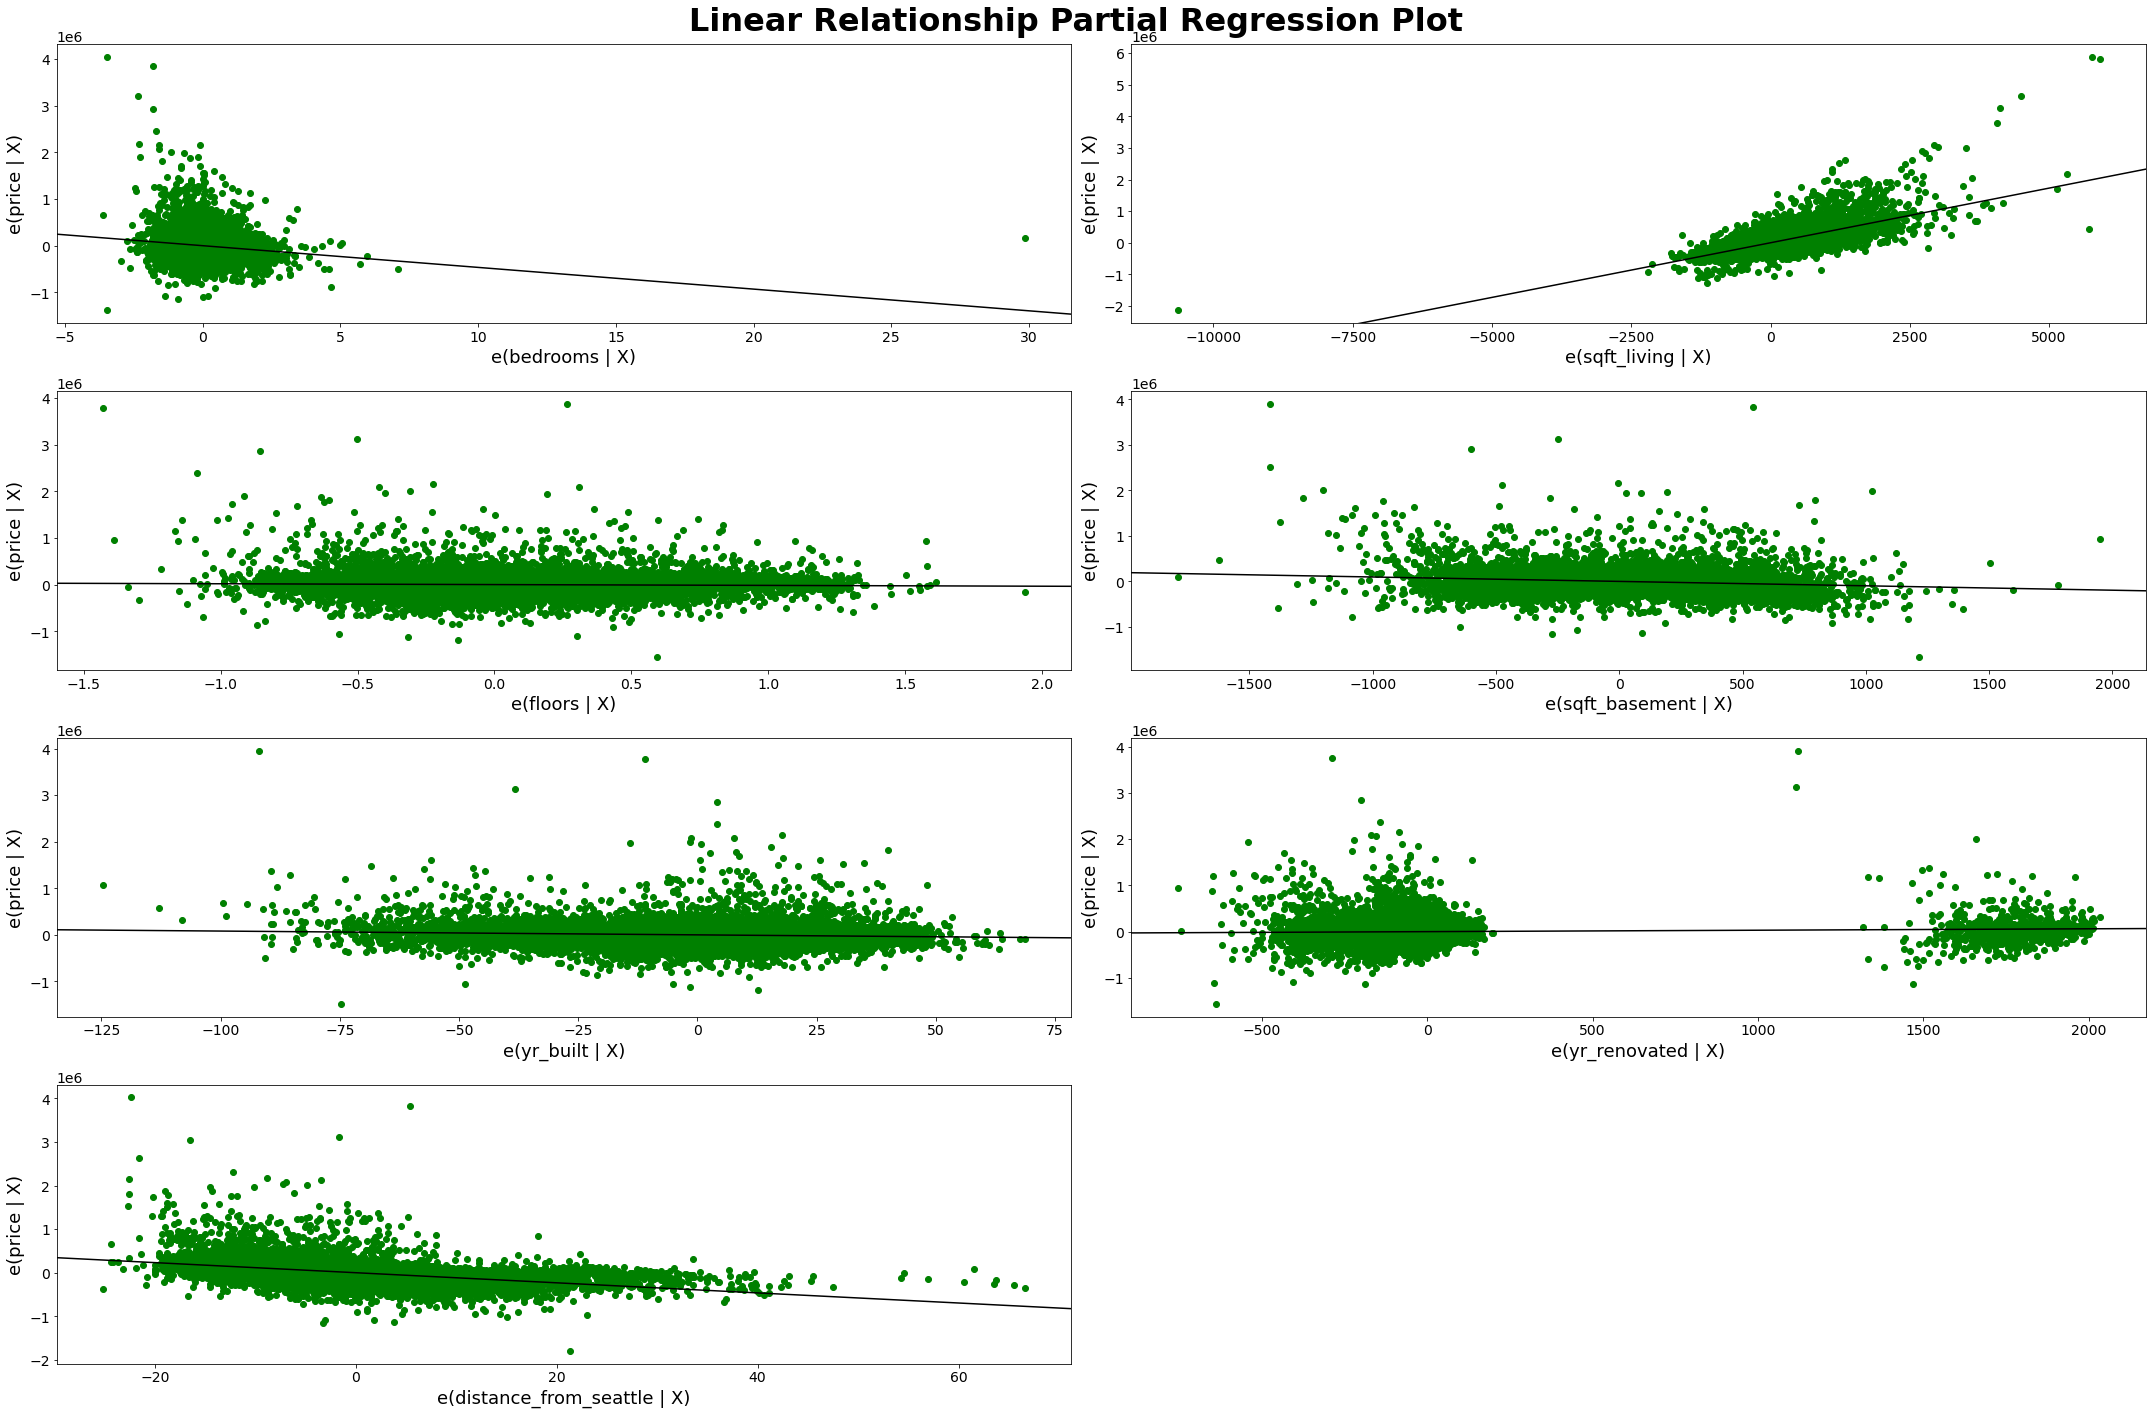

In [93]:
fig = plt.figure(figsize=(30,20))
sm.graphics.plot_partregress_grid(iteration_1, exog_idx=["bedrooms", "sqft_living", "floors", "sqft_basement", "yr_built", "yr_renovated", "distance_from_seattle"], fig=fig)
# Customizing plot appearance; note that the StatsModels code actually uses .plot
# with marker 'o', so what looks like a scatter plot is a "line" internally, so
# we access it using .lines rather than .collections
for ax in fig.axes:
    ax.lines[0].set_color("green")
fig.suptitle("Linear Relationship Partial Regression Plot", fontsize=32, fontweight="bold")
plt.tight_layout()
plt.show();

- From the Partial regression plots, its evident that there are no features that exhibit nonlinear relationships.
- The feature variables either show positive linear correlation with price or negative correlation or no correlation.
- Furthermore, the partial regression plot indicate presence of outliers.
- They also show that some of the columns such as yrs_renovated need to be modified since they have placeholders that make it appear as categorical data.

#### Dealing with Outliers

#### Outliers in the target variable

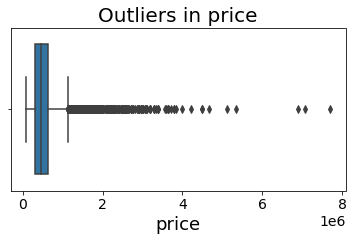

In [41]:
plt.figure(figsize=(6,3))

sns.boxplot(x=data_df['price'])

plt.title('Outliers in price')
plt.show()

In [42]:
# Calculate the Z-score for the data series
# price_z_scores = (data_df['price'] - data_df['price'].mean()) / data_df['price'].std()
# Identify outliers based on a threshold (e.g., 3 or -3)
# price_outliers = data_df['price'][abs(price_z_scores) > 3]
# data_df.drop(price_outliers.index, inplace=True)

#### Outliers in Feature Variables

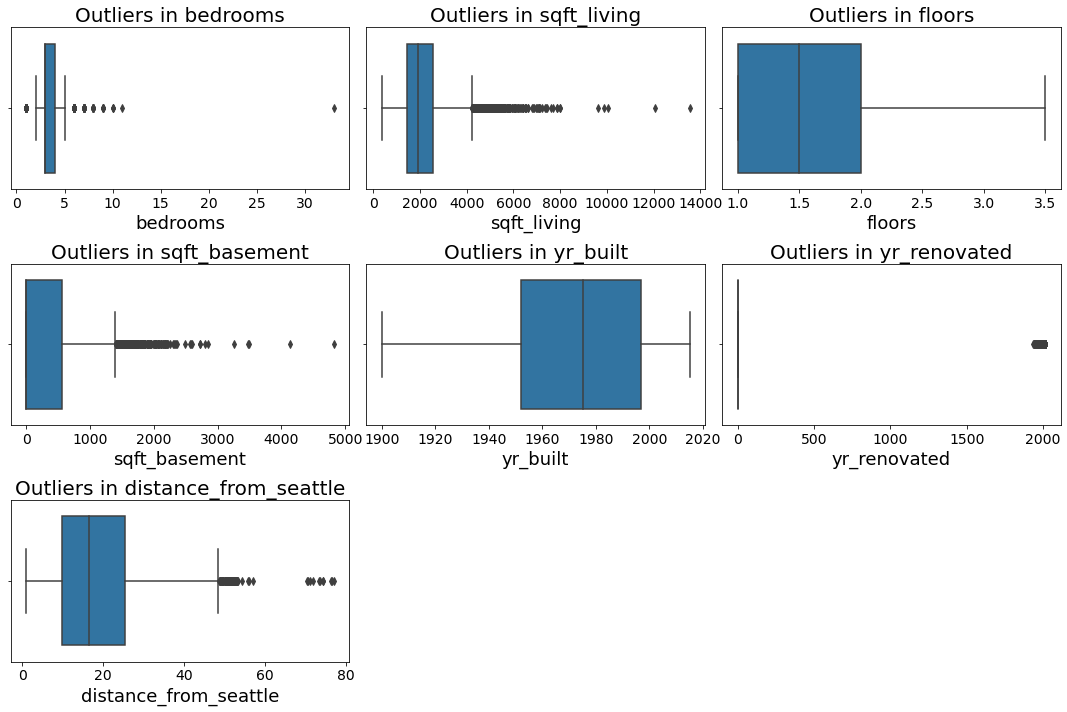

In [43]:

independent_variables = ['bedrooms', 'sqft_living', 'floors', 'sqft_basement', 'yr_built', 'yr_renovated', 
                         'distance_from_seattle']  # Replace with your actual column names

num_plots = len(independent_variables)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Set the figure size and create subplots

for i, variable in enumerate(independent_variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.boxplot(x=variable, data=data_df, ax=ax)
    ax.set_title(f'Outliers in {variable}')  # Set the title for each subplot

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()  # Show the plot


From the boxplots above we can conclude that the following columns have outliers:
- Bedrooms
- sqft-living
- sqft_basement
- Distance from seattle
- Yrs_renovated

##### Removing Outliers

In [44]:
# Calculate the Z-score for the data series
bedroom_z_scores = (data_df['bedrooms'] - data_df['bedrooms'].mean()) / data_df['bedrooms'].std()
# Identify outliers based on a threshold (e.g., 3 or -3)
bedroom_outliers = data_df['bedrooms'][abs(bedroom_z_scores) > 3]
data_df.drop(bedroom_outliers.index, inplace=True)

In [45]:
# Calculate the Z-score for the data series
# sqftliving_z_scores = (data_df['sqft_living'] - data_df['sqft_living'].mean()) / data_df['sqft_living'].std()
# Identify outliers based on a threshold (e.g., 3 or -3)
# sqftliving_outliers = data_df['sqft_living'][abs(sqftliving_z_scores) > 3]
# data_df.drop(sqftliving_outliers.index, inplace=True)

In [46]:
# Calculate the Z-score for the data series
# sqftbasement_z_scores = (data_df['sqft_basement'] - data_df['sqft_basement'].mean()) / data_df['sqft_basement'].std()
# Identify outliers based on a threshold (e.g., 3 or -3)
# sqftbasement_outliers = data_df['sqft_basement'][abs(sqftbasement_z_scores) > 3]
# data_df.drop(sqftbasement_outliers.index, inplace=True)

In [47]:
# Calculate the Z-score for the data series
# distancefromseattle_z_scores = (data_df['distance_from_seattle'] - data_df['distance_from_seattle'].mean()) / data_df['distance_from_seattle'].std()
# Identify outliers based on a threshold (e.g., 3 or -3)
# distancefromseattle_outliers = data_df['distance_from_seattle'][abs(distancefromseattle_z_scores) > 3]
# data_df.drop(distancefromseattle_outliers.index, inplace=True)

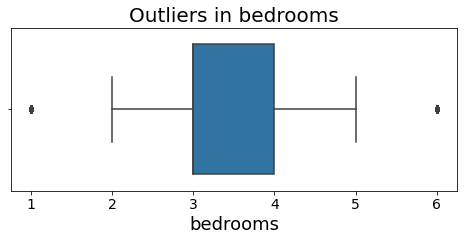

In [48]:
plt.figure(figsize=(8,3))

sns.boxplot(x=data_df['bedrooms'])

plt.title('Outliers in bedrooms')
plt.show()

#### Modifying the Year renovated column
 - The year renovated columns has zero values. We assumed that the rows with zero for the yr renovated are those houses that were renovated long ago. Therefore we replaced all zeros in this columns using the earliest year of renovaiton within the column(1934).
- We then feature engineered a new column called Number of years since renovation.

In [49]:
unique_values = data_df['yr_renovated'].unique()
unique_values_sorted = sorted(unique_values)
print(unique_values_sorted) # Ascertaining the earliest year of renovation withn the dataset

[0.0, 1934.0, 1940.0, 1944.0, 1945.0, 1948.0, 1950.0, 1951.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1962.0, 1963.0, 1964.0, 1965.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0]


In [50]:
# Replacing the O values with the earliest year of renovation
data_df['yr_renovated'] = data_df['yr_renovated'].replace(0.0, 1934.0)

In [51]:
# Feature Engineering a new variable called No_ of_ years_since Renovation
# Also feature engineeered Age of  House from the columns yrs_built
data_df['No_Yr_Since_Renovation'] = 2023 - data_df['yr_renovated']
data_df['Age_of_house'] = 2023 - data_df['yr_built']
data_df = data_df.drop(['yr_renovated', 'yr_built'], axis=1) # dropped yrs_built and yrs_renovated
data_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,sqft_living15,sqft_lot15,season,distance_from_seattle,No_Yr_Since_Renovation,Age_of_house
1,538000.0,3,2.25,2570,7242,2.0,NO,2170,400.0,1690,7639,Winter,12.802819,32.0,72
3,604000.0,4,3.00,1960,5000,1.0,NO,1050,910.0,1360,5000,Winter,10.538233,89.0,58
4,510000.0,3,2.00,1680,8080,1.0,NO,1680,0.0,1800,7503,Winter,21.553979,89.0,36
5,1230000.0,4,4.50,5420,101930,1.0,NO,3890,1530.0,4760,101930,Spring,25.131188,89.0,22
8,229500.0,3,1.00,1780,7470,1.0,NO,1050,730.0,1780,8113,Spring,10.447676,89.0,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,475000.0,3,2.50,1310,1294,2.0,NO,1180,130.0,1330,1265,Winter,6.601720,89.0,15
21592,360000.0,3,2.50,1530,1131,3.0,NO,1530,0.0,1530,1509,Spring,10.404472,89.0,14
21593,400000.0,4,2.50,2310,5813,2.0,NO,2310,0.0,1830,7200,Winter,10.853552,89.0,9
21594,402101.0,2,0.75,1020,1350,2.0,NO,1020,0.0,1020,2007,Summer,2.807293,89.0,14


## Model 3

In [52]:
y = data_df["price"]

X_3 = data_df.drop(data_df.columns[:1], axis=1) 

In [53]:
X_3 = pd.get_dummies(X_3, columns = ["waterfront", "season"],drop_first =True)
X_3 = X_3.drop(["sqft_above", "sqft_living15","bathrooms","sqft_lot","sqft_lot15", "season_Summer",
                "season_Winter"], axis=1)
X_3.head()

,bedrooms,sqft_living,floors,sqft_basement,distance_from_seattle,No_Yr_Since_Renovation,Age_of_house,waterfront_YES,season_Spring
1,3,2570,2.0,400.0,12.802819,32.0,72,0,0
3,4,1960,1.0,910.0,10.538233,89.0,58,0,0
4,3,1680,1.0,0.0,21.553979,89.0,36,0,0
5,4,5420,1.0,1530.0,25.131188,89.0,22,0,1
8,3,1780,1.0,730.0,10.447676,89.0,63,0,1


In [54]:
model_3 = sm.OLS(y, sm.add_constant(X_3))
iteration_2 = model_3.fit()

print(iteration_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     3469.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:52:05   Log-Likelihood:            -2.0940e+05
No. Observations:               15301   AIC:                         4.188e+05
Df Residuals:                   15291   BIC:                         4.189e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.05

##### Checking for RMSE and MAE

In [55]:
y_prediteration_2 = iteration_1.predict(sm.add_constant(X_3))
print(f"MAE for model 3: {mean_absolute_error(y, y_prediteration_2)}")
print(f"RSME for model 3: {mean_squared_error(y, y_prediteration_2, squared=False)}")

MAE for model 3: 1212022.055206704
RSME for model 3: 1295347.6282002921


#### Interpretation of model 3
- There is a remarkable improvement in our R-squared now at 67.1 from 66.9.
- The RMSE and MSE have also reduced as required
- We continue to refine our model  by ensuring other linear assumptions are satisfied

### Checking for Homoscedasticity

#### Breusch pagan test

In [56]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [57]:
het_breuschpagan(sm.OLS(y, sm.add_constant(X_3)).fit().resid, sm.add_constant(X_3))

(2136.9098680785005, 0.0, 275.796491020791, 0.0)

Null Hypothesis = The residuals are homoscedastic
Based on the above output(p-values) we reject the null hypothesis and Conclude that our data is not homoscedastic.

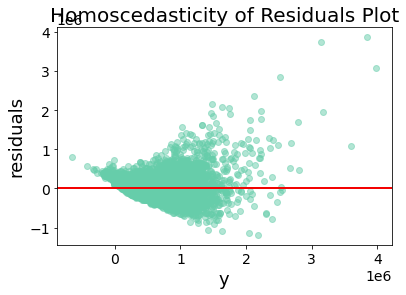

In [94]:
# Create a LinearRegression model
model = LinearRegression()

# Train the model using your training data
model.fit(X_3, y)

# Make predictions using the trained model
fit_line_generated = model.predict(X_3)

# Calculate residuals
resids_generated = y - fit_line_generated

# Create scatter plot of data
fig, ax = plt.subplots()
ax.scatter(fit_line_generated, resids_generated, color="mediumaquamarine", alpha=0.5)

# Plot horizontal lines
scale = 1.0
ax.axhline(y=0, color="black")
ax.axhline(y=scale*3, color="red")  # Again, we know the position of these
ax.axhline(y=-scale*3, color="red") # lines because we generated the data

# Customize labels
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Homoscedasticity of Residuals Plot");

### Checking For Normality of Residuals

To test for normality we  used tests and visualization.

#### Jarque_bera test
To test for normality

In [59]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(iteration_2.resid)

(587423.7752548862, 0.0, 2.735361390174818, 32.857327911105045)

#### K-test
To test for normality

Dealing with the Depenedent Variable/Target(y)


### Checking for Normality of our Target variable(y)

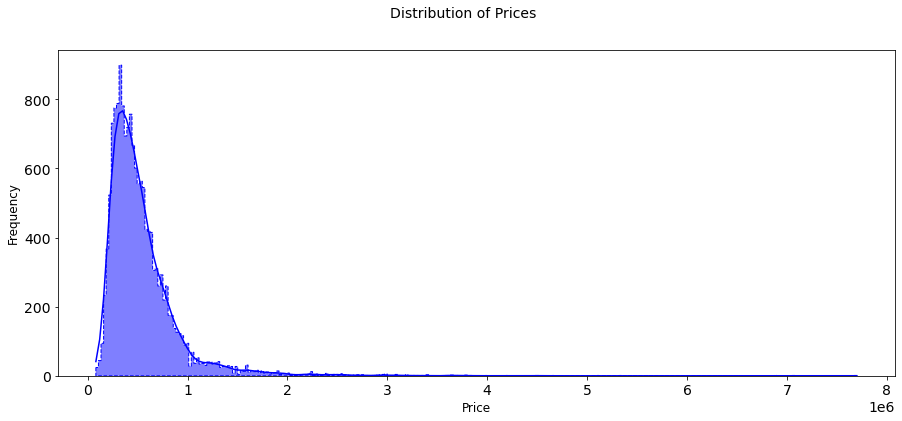

In [60]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(data_df['price'], element="step", kde=True, color="blue", ax=ax, linestyle='--', bins='auto')

ax.set_xlabel("Price", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
fig.suptitle("Distribution of Prices", fontsize=14)

plt.show()


The target variable shows positively skewed distribution, also known as a right-skewed distribution. The tail on the right side of the distribution is longer and more spread out than the tail on the left side. As a result, the majority of the data points or values have clustered toward the left side of the distribution, while a few extreme values have extended the right tail.

#### Using QQplot

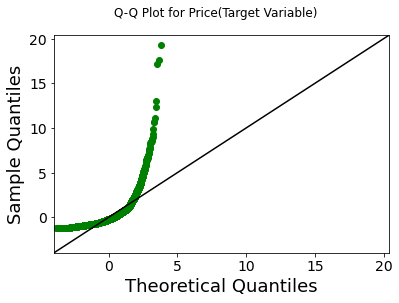

In [61]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

fig, ax = plt.subplots()
sm.graphics.qqplot(data_df['price'], dist=stats.norm, line='45', fit=True, ax=ax)
# Customize plot appearance
scatter = ax.lines[0]
line = ax.lines[1]
scatter.set_markeredgecolor("green")
scatter.set_markerfacecolor("green")
line.set_color("black")
fig.suptitle("Q-Q Plot for Price(Target Variable)");

In [62]:
stats.kstest(data_df['price'], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

The result for ktest and the Q Q plot suggests that the distribution of the target variable(y) does not follow a normal distribution. The p-value of 0.0 indicates that the probability of obtaining such extreme test statistic value (or even more extreme) under the assumption of normality is extremely low

### Checking for Normality of Feature Variables(X)

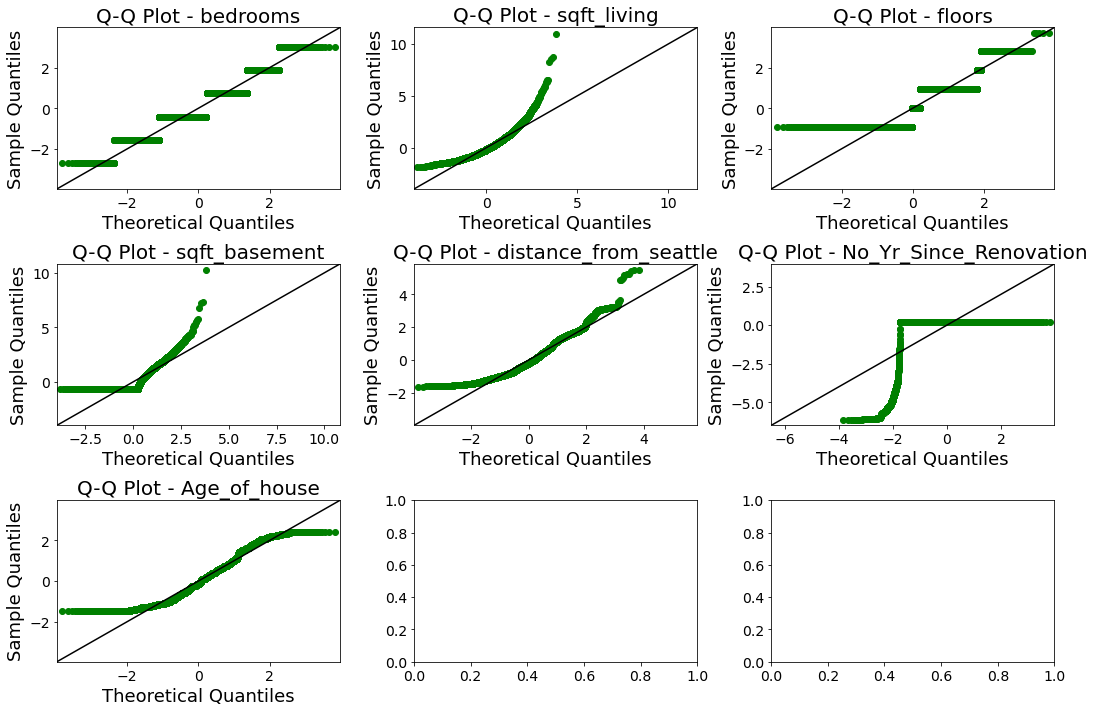

In [63]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

variables = ['bedrooms', 'sqft_living', 'floors', 'sqft_basement', 'distance_from_seattle', 'No_Yr_Since_Renovation', 
             'Age_of_house']

num_rows = 3
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))

for i, variable in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sm.graphics.qqplot(data_df[variable], dist=stats.norm, line='45', fit=True, ax=ax)

    scatter = ax.lines[0]
    line = ax.lines[1]
    scatter.set_markeredgecolor("green")
    scatter.set_markerfacecolor("green")
    line.set_color("black")

    ax.set_xlabel("Theoretical Quantiles")
    ax.set_ylabel("Sample Quantiles")
    ax.set_title(f"Q-Q Plot - {variable}")

plt.tight_layout()
plt.show()

In [64]:
from scipy.stats import kstest

variables = ['bedrooms', 'sqft_living', 'floors', 'sqft_basement', 'distance_from_seattle', 'No_Yr_Since_Renovation', 'Age_of_house']

for variable in variables:
    data = data_df[variable]  # Assuming 'data_df' is the DataFrame containing your data
    
    statistic, p_value = kstest(data, 'norm')
    
    alpha = 0.05  # significance level
    
    if p_value > alpha:
        print(f"The distribution of '{variable}' appears to be normally distributed (fail to reject H0)")
    else:
        print(f"The distribution of '{variable}' does not appear to be normally distributed (reject H0)")

The distribution of 'bedrooms' does not appear to be normally distributed (reject H0)
The distribution of 'sqft_living' does not appear to be normally distributed (reject H0)
The distribution of 'floors' does not appear to be normally distributed (reject H0)
The distribution of 'sqft_basement' does not appear to be normally distributed (reject H0)
The distribution of 'distance_from_seattle' does not appear to be normally distributed (reject H0)
The distribution of 'No_Yr_Since_Renovation' does not appear to be normally distributed (reject H0)
The distribution of 'Age_of_house' does not appear to be normally distributed (reject H0)


The Q-Q plots the ktest suggests both the target variable and the feature variables do not follow a normal distribution thus the need for log transformation

## Log Transformation

#### Log Transformation of the Target Variable (Y)

In [65]:
y = data_df['price']

In [66]:
y = data_df['price']
y_log = np.log(y)
y_log.name = "log(price)"
y_log

1        13.195614
3        13.311329
4        13.142166
5        14.022525
8        12.343658
           ...    
21591    13.071070
21592    12.793859
21593    12.899220
21594    12.904459
21596    12.691580
Name: log(price), Length: 15301, dtype: float64

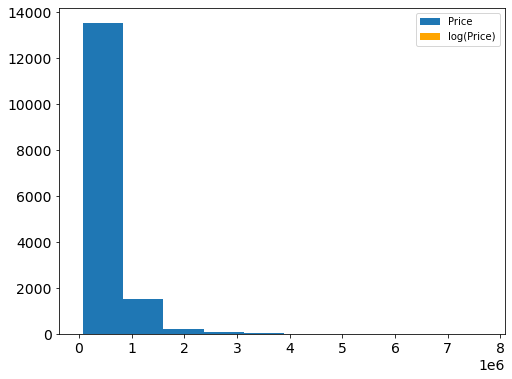

In [67]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(y, label="Price")
ax.hist(y_log, color="orange", label="log(Price)")
ax.legend();

In [68]:
X_4 = data_df.drop(data_df.columns[:1], axis=1)

In [69]:
X_4 = pd.get_dummies(X_4, columns = ["waterfront", "season"],drop_first =True)
X_4 = X_4.drop(["sqft_above", "sqft_living15","bathrooms","sqft_lot","sqft_lot15", "season_Summer", "season_Winter", 
                "sqft_basement", "No_Yr_Since_Renovation"], axis=1)
X_4.head()

,bedrooms,sqft_living,floors,distance_from_seattle,Age_of_house,waterfront_YES,season_Spring
1,3,2570,2.0,12.802819,72,0,0
3,4,1960,1.0,10.538233,58,0,0
4,3,1680,1.0,21.553979,36,0,0
5,4,5420,1.0,25.131188,22,0,1
8,3,1780,1.0,10.447676,63,0,1


### Model 4

In [70]:
model_4 = sm.OLS(y_log, sm.add_constant(X_4))
iteration_3 = model_4.fit()

print(iteration_3.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     4417.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:52:11   Log-Likelihood:                -3400.3
No. Observations:               15301   AIC:                             6817.
Df Residuals:                   15293   BIC:                             6878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.50

In [71]:
y_prediteration_3 = iteration_3.predict(sm.add_constant(X_4))
print(f"MAE for model 4: {mean_absolute_error(y, y_prediteration_3)}")
print(f"RSME for model 4: {mean_squared_error(y, y_prediteration_3, squared=False)}")

MAE for model 4: 540176.40030696
RSME for model 4: 655009.7835539838


#### Log Transformation of Feature Variables(X)

In [72]:
# Log transforming the feature variables sqft living
X_sqftliving_log = X_4.copy()

X_sqftliving_log["log(sqft_living)"] = np.log(X_sqftliving_log["sqft_living"])

# Visually inspect raw vs. transformed values
X_sqftliving_log[["sqft_living", "log(sqft_living)"]]

,sqft_living,log(sqft_living)
1,2570,7.851661
3,1960,7.580700
4,1680,7.426549
5,5420,8.597851
8,1780,7.484369
...,...,...
21591,1310,7.177782
21592,1530,7.333023
21593,2310,7.745003
21594,1020,6.927558


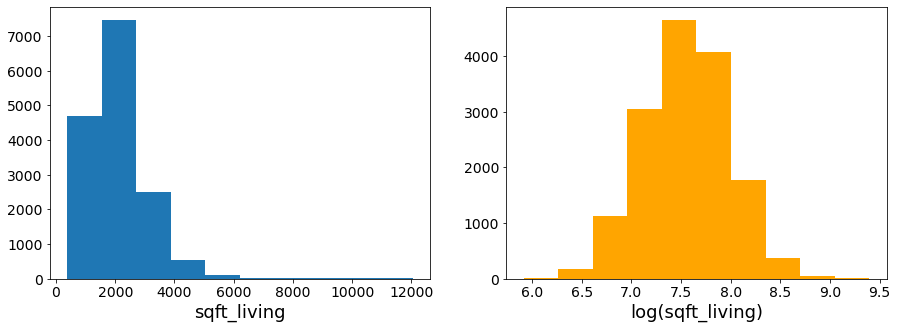

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(X_sqftliving_log["sqft_living"])
ax1.set_xlabel("sqft_living")
ax2.hist(X_sqftliving_log["log(sqft_living)"], color="orange")
ax2.set_xlabel("log(sqft_living)");

In [74]:
model_5 = sm.OLS(y_log, sm.add_constant(X_sqftliving_log))
iteration_4 = model_5.fit()

print(iteration_4.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     4037.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:52:12   Log-Likelihood:                -3175.3
No. Observations:               15301   AIC:                             6369.
Df Residuals:                   15292   BIC:                             6437.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.59

In [75]:
y_prediteration_4 = iteration_4.predict(sm.add_constant(X_sqftliving_log))
print(f"MAE for model 4: {mean_absolute_error(y, y_prediteration_4)}")
print(f"RSME for model 4: {mean_squared_error(y, y_prediteration_4, squared=False)}")

MAE for model 4: 540176.4003069601
RSME for model 4: 655009.7874754862


In [76]:
X_Distance_log = X_sqftliving_log.copy()

X_Distance_log["log(distance_from_seattle)"] = np.log(X_Distance_log["distance_from_seattle"])

# Visually inspect raw vs. transformed values
X_Distance_log[["distance_from_seattle", "log(distance_from_seattle)"]].sample(3)

,distance_from_seattle,log(distance_from_seattle)
10125,10.488024,2.350234
18685,14.197658,2.653077
18923,0.983119,-0.017025


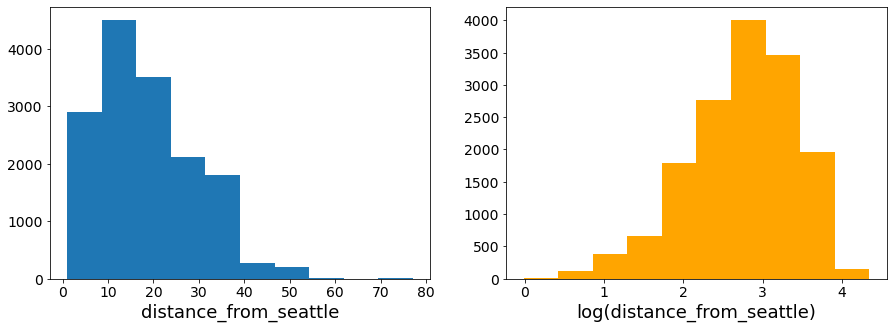

In [77]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(X_Distance_log["distance_from_seattle"])
ax1.set_xlabel("distance_from_seattle")
ax2.hist(X_Distance_log["log(distance_from_seattle)"], color="orange")
ax2.set_xlabel("log(distance_from_seattle)");

In [78]:
X_HouseAge_log = X_sqftliving_log.copy()

X_HouseAge_log["log(Age_of_house)"] = np.log(X_HouseAge_log["Age_of_house"])

# Visually inspect raw vs. transformed values
X_HouseAge_log[["Age_of_house", "log(Age_of_house)"]].sample(3)

,Age_of_house,log(Age_of_house)
8572,25,3.218876
6341,30,3.401197
18823,25,3.218876


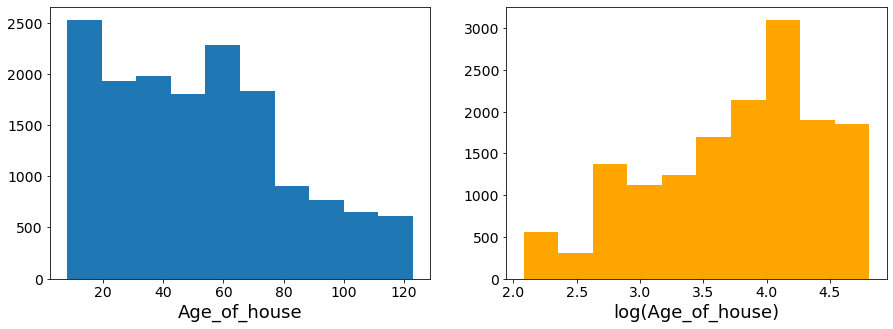

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.hist(X_HouseAge_log["Age_of_house"])
ax1.set_xlabel("Age_of_house")
ax2.hist(X_HouseAge_log["log(Age_of_house)"], color="orange")
ax2.set_xlabel("log(Age_of_house)");

In [80]:
X_HouseAge_log.drop(['sqft_living', 'Age_of_house'], axis = 1)

,bedrooms,floors,distance_from_seattle,waterfront_YES,season_Spring,log(sqft_living),log(Age_of_house)
1,3,2.0,12.802819,0,0,7.851661,4.276666
3,4,1.0,10.538233,0,0,7.580700,4.060443
4,3,1.0,21.553979,0,0,7.426549,3.583519
5,4,1.0,25.131188,0,1,8.597851,3.091042
8,3,1.0,10.447676,0,1,7.484369,4.143135
...,...,...,...,...,...,...,...
21591,3,2.0,6.601720,0,0,7.177782,2.708050
21592,3,3.0,10.404472,0,1,7.333023,2.639057
21593,4,2.0,10.853552,0,0,7.745003,2.197225
21594,2,2.0,2.807293,0,0,6.927558,2.639057


In [81]:
model_6 = sm.OLS(y_log, sm.add_constant(X_HouseAge_log))
iteration_5 = model_6.fit()

print(iteration_5.summary())

                            OLS Regression Results                            
Dep. Variable:             log(price)   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     3601.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:52:15   Log-Likelihood:                -3157.7
No. Observations:               15301   AIC:                             6335.
Df Residuals:                   15291   BIC:                             6412.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     9.74

In [82]:
y_prediteration_5 = iteration_5.predict(sm.add_constant(X_Distance_log))
print(f"MAE for model 5: {mean_absolute_error(y, y_prediteration_5)}")
print(f"RSME for model 5: {mean_squared_error(y, y_prediteration_5, squared=False)}")

MAE for model 5: 540176.3223288098
RSME for model 5: 655009.7178297067
